In [3]:
import pandas as pd
from sklearn import linear_model
 
coal = pd.read_csv('lager_antioxidant_reg.csv')
coal.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [7]:
x_columns = [col for col in coal.columns.values if col != "tpc"]
beer_x = coal[x_columns]
beer_y = coal["tpc"]

In [8]:
beer_model = linear_model.LinearRegression()

In [9]:
beer_model.fit(beer_x, beer_y)

LinearRegression()

In [10]:
beer_model.intercept_

18.830383913148466

In [11]:
beer_model.coef_

array([ 5.84731786e-02,  1.28827809e+00,  1.27650959e+02, -6.14737240e-01,
       -1.09375291e+00,  7.35403422e+01,  3.76892085e-01])

In [12]:
beer_model.score(beer_x, beer_y)

0.8219280156188545

0.8219280156188545

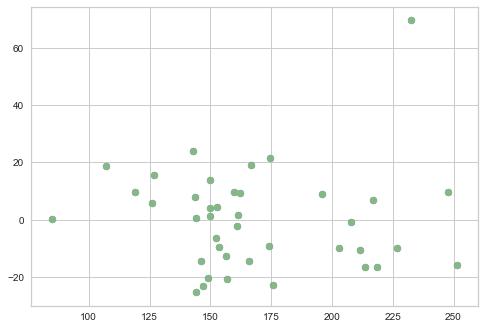

In [13]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(beer_model, hist=False)
visualizer.fit(beer_x, beer_y)  # Fit the training data to the model
visualizer.score(beer_x, beer_y) 

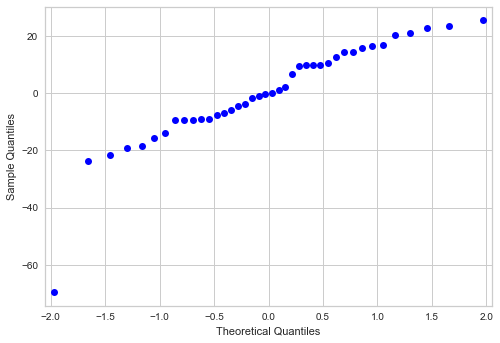

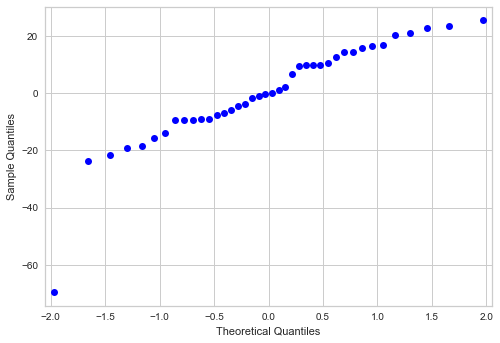

In [14]:
import statsmodels.api as sm
 
predictions = beer_model.predict(beer_x)
residuals = beer_y - predictions
sm.qqplot(residuals)